In [6]:
import sys
import os
sys.path.append(os.path.abspath("D:\\Python\\commodity_futures_price"))

import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Read the Files of Commodities

In [11]:
df_dict = {}
valid_dates = pd.date_range(start="2011-01-01", end="2024-12-31", freq="B")
# Read each file in below folder
path = "../data/raw/"
files = os.listdir(path)
for file in files:
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file), index_col=0, parse_dates=True)
        # df["Return"] = df.iloc[:, 0:1].apply(lambda x: np.log(x.shift(-1) / x))
        df = df.dropna()

        non_positive_LA = df[(df[df.columns[0]] <= 0) | (df['Volatility'] <= 0)]
        df = df.drop(index=non_positive_LA.index)

        df_dict[file[:-4]] = df
        valid_dates = valid_dates.intersection(df.index)
for name, df in df_dict.items():
    df_dict[name] = df[df.index.isin(valid_dates)]

### Data Cleaning

There are some dataframes with price data haven't change for a period.

In [207]:
for name, df in df_dict.items():
    for i in range(len(df) - 1):
        if df.iloc[i, 0:1].values[0] == df.iloc[i + 1, 0:1].values[0]:
            print(f"Price for {name} is constant at {df.index[i]}.")

Price for BO is constant at 2017-07-31 00:00:00.
Price for CC is constant at 2014-07-31 00:00:00.
Price for DA is constant at 2015-04-30 00:00:00.
Price for DA is constant at 2023-11-30 00:00:00.
Price for DA is constant at 2023-12-29 00:00:00.
Price for LA is constant at 2019-06-28 00:00:00.
Price for LB is constant at 2023-05-31 00:00:00.
Price for LB is constant at 2023-06-30 00:00:00.
Price for LB is constant at 2023-07-31 00:00:00.
Price for LB is constant at 2023-08-31 00:00:00.
Price for LB is constant at 2023-09-29 00:00:00.
Price for LB is constant at 2023-10-31 00:00:00.
Price for LB is constant at 2023-11-30 00:00:00.
Price for LB is constant at 2023-12-29 00:00:00.
Price for LB is constant at 2024-01-31 00:00:00.
Price for LB is constant at 2024-02-29 00:00:00.
Price for LB is constant at 2024-03-29 00:00:00.
Price for LB is constant at 2024-04-30 00:00:00.
Price for LC is constant at 2018-12-31 00:00:00.
Price for LC is constant at 2024-03-29 00:00:00.
Price for LH is cons

Manual Check by investing.com:  
- Correct: BO, CC, DA, LA, LC, LH, SB, SM
- Incorrect: LB

### EDA

Here take the first dataframe to have a glance on the data.

In [12]:
BO = df_dict["BO"]
returns = BO.iloc[:, 0:1].apply(lambda x: x.shift(-1) / x)
log_returns = returns.apply(lambda x: np.log(x))

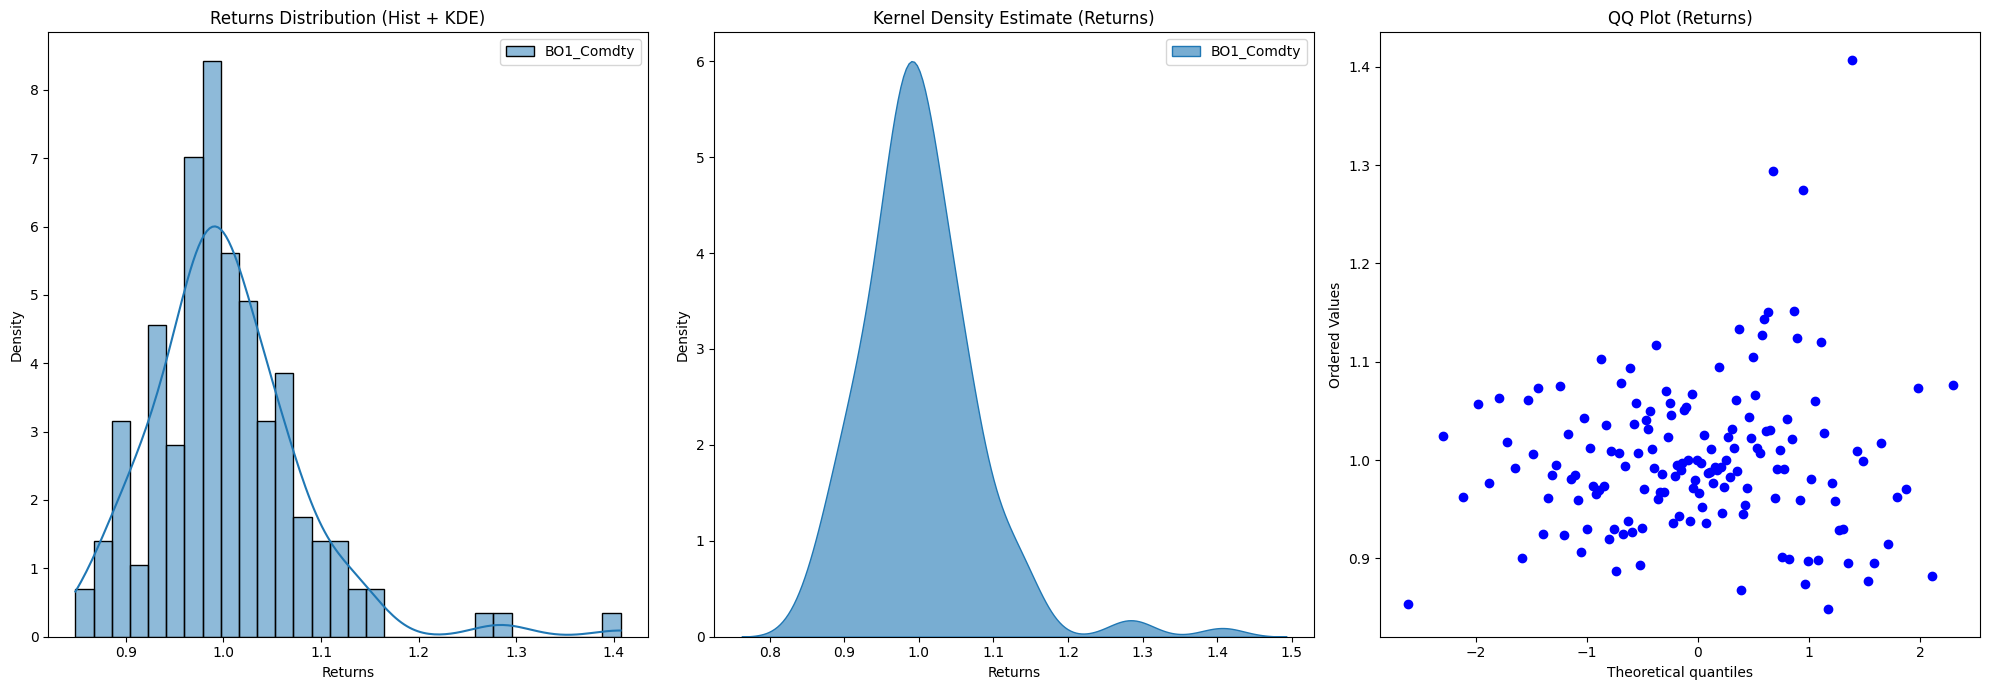

In [13]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
sns.histplot(returns, bins=30, kde=True, color='steelblue', stat="density")
plt.title('Returns Distribution (Hist + KDE)')
plt.xlabel('Returns')
plt.ylabel('Density')

plt.subplot(1, 3, 2)
sns.kdeplot(returns, fill=True, color='darkred', alpha=0.6)
plt.title('Kernel Density Estimate (Returns)')
plt.xlabel('Returns')
plt.ylabel('Density')

plt.subplot(1, 3, 3)
stats.probplot(returns, dist="norm", plot=plt)
plt.title('QQ Plot (Returns)')

plt.tight_layout()
plt.show()

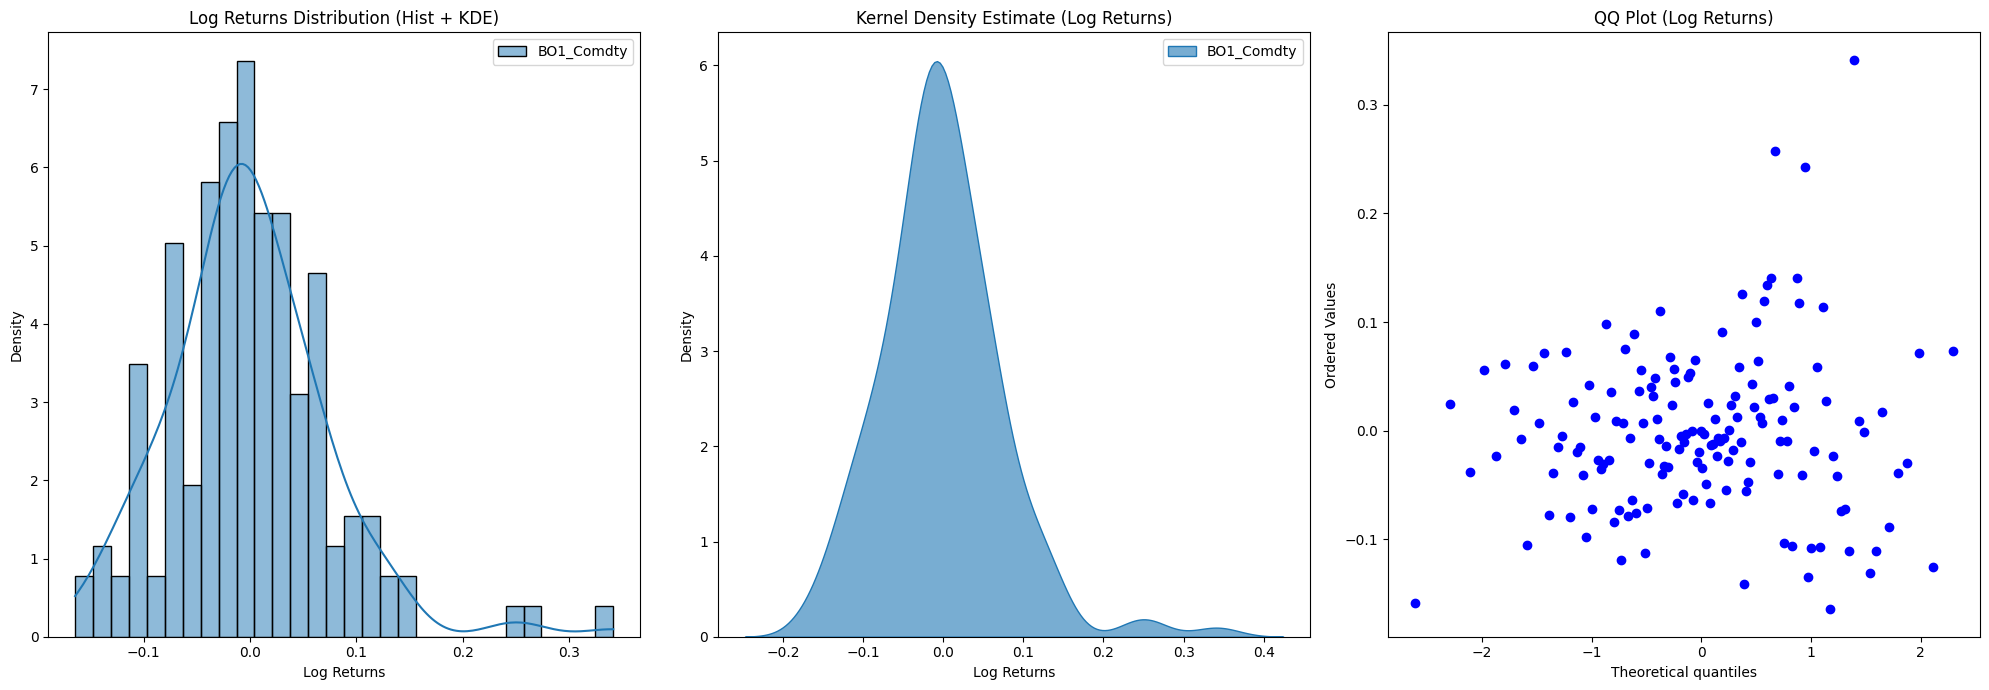

In [14]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
sns.histplot(log_returns, bins=30, kde=True, color='steelblue', stat="density")
plt.title('Log Returns Distribution (Hist + KDE)')
plt.xlabel('Log Returns')
plt.ylabel('Density')
log_returns
plt.subplot(1, 3, 2)
sns.kdeplot(log_returns, fill=True, color='darkred', alpha=0.6)
plt.title('Kernel Density Estimate (Log Returns)')
plt.xlabel('Log Returns')
plt.ylabel('Density')

plt.subplot(1, 3, 3)
stats.probplot(log_returns, dist="norm", plot=plt)
plt.title('QQ Plot (Log Returns)')

plt.tight_layout()
plt.show()

In [26]:
# take returns larger than 1.2 as outliers
outliers = returns[returns > 1.2].dropna()
print(outliers)

            BO1_Comdty
Dates                 
2021-03-31    1.293651
2022-03-31    1.274950
2023-05-31    1.407143
